In [2]:
import pandas as pd
import os

current_directory = os.getcwd()
print(f"\nCurrent working directory: {current_directory}\n")

filename = os.path.join("Datasets", "groove", "info.csv")

data = pd.read_csv(filename, encoding="latin-1")
data.head()


Current working directory: c:\Users\kevin\Documents\MMI\Audio Data Science\StyleExtraction



,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,split
0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,27.872308,test
1,drummer1,drummer1/eval_session,drummer1/eval_session/10,soul/groove10,102,beat,4-4,drummer1/eval_session/10_soul-groove10_102_bea...,drummer1/eval_session/10_soul-groove10_102_bea...,37.691158,test
2,drummer1,drummer1/eval_session,drummer1/eval_session/2,funk/groove2,105,beat,4-4,drummer1/eval_session/2_funk-groove2_105_beat_...,drummer1/eval_session/2_funk-groove2_105_beat_...,36.351218,test
3,drummer1,drummer1/eval_session,drummer1/eval_session/3,soul/groove3,86,beat,4-4,drummer1/eval_session/3_soul-groove3_86_beat_4...,drummer1/eval_session/3_soul-groove3_86_beat_4...,44.716543,test
4,drummer1,drummer1/eval_session,drummer1/eval_session/4,soul/groove4,80,beat,4-4,drummer1/eval_session/4_soul-groove4_80_beat_4...,drummer1/eval_session/4_soul-groove4_80_beat_4...,47.987500,test


In [3]:
data["style"].value_counts()

style
rock                       281
hiphop                      91
funk                        77
punk                        58
neworleans/funk             48
                          ... 
middleeastern                1
latin/bomba                  1
latin/merengue               1
rock/rockabilly              1
latin/venezuelan-joropo      1
Name: count, Length: 76, dtype: int64

In [4]:
# split style column into style1 and style2 where needed
data["style1"] = data["style"].apply(lambda x: x.split("/")[0] if "/" in x else x)
data["style2"] = data["style"].apply(lambda x: x.split("/")[1] if "/" in x else None)
data.head()

,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,split,style1,style2
0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,27.872308,test,funk,groove1
1,drummer1,drummer1/eval_session,drummer1/eval_session/10,soul/groove10,102,beat,4-4,drummer1/eval_session/10_soul-groove10_102_bea...,drummer1/eval_session/10_soul-groove10_102_bea...,37.691158,test,soul,groove10
2,drummer1,drummer1/eval_session,drummer1/eval_session/2,funk/groove2,105,beat,4-4,drummer1/eval_session/2_funk-groove2_105_beat_...,drummer1/eval_session/2_funk-groove2_105_beat_...,36.351218,test,funk,groove2
3,drummer1,drummer1/eval_session,drummer1/eval_session/3,soul/groove3,86,beat,4-4,drummer1/eval_session/3_soul-groove3_86_beat_4...,drummer1/eval_session/3_soul-groove3_86_beat_4...,44.716543,test,soul,groove3
4,drummer1,drummer1/eval_session,drummer1/eval_session/4,soul/groove4,80,beat,4-4,drummer1/eval_session/4_soul-groove4_80_beat_4...,drummer1/eval_session/4_soul-groove4_80_beat_4...,47.987500,test,soul,groove4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   drummer         1150 non-null   object 
 1   session         1150 non-null   object 
 2   id              1150 non-null   object 
 3   style           1150 non-null   object 
 4   bpm             1150 non-null   int64  
 5   beat_type       1150 non-null   object 
 6   time_signature  1150 non-null   object 
 7   midi_filename   1150 non-null   object 
 8   audio_filename  1090 non-null   object 
 9   duration        1150 non-null   float64
 10  split           1150 non-null   object 
 11  style1          1150 non-null   object 
 12  style2          456 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 116.9+ KB


In [6]:
# drop all data where there is no audio file
data = data.dropna(subset=['audio_filename'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1133
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   drummer         1090 non-null   object 
 1   session         1090 non-null   object 
 2   id              1090 non-null   object 
 3   style           1090 non-null   object 
 4   bpm             1090 non-null   int64  
 5   beat_type       1090 non-null   object 
 6   time_signature  1090 non-null   object 
 7   midi_filename   1090 non-null   object 
 8   audio_filename  1090 non-null   object 
 9   duration        1090 non-null   float64
 10  split           1090 non-null   object 
 11  style1          1090 non-null   object 
 12  style2          445 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 119.2+ KB


In [7]:
data.style1.value_counts()

style1
rock             315
funk             152
jazz             101
hiphop            93
latin             88
soul              63
afrocuban         60
punk              58
neworleans        51
country           29
pop               27
reggae            20
gospel            19
dance              5
afrobeat           4
blues              4
middleeastern      1
Name: count, dtype: int64

In [8]:
data.style2.value_counts()

style2
funk                     70
halftime                 37
brazilian-baiao          32
bembe                    30
purdieshuffle            30
rock                     20
fast                     20
rhumba                   19
samba                    19
motown                   16
soft                     13
swing                    11
fusion                   11
indie                     8
shuffle                   8
brazilian-samba           5
groove10                  4
groove1                   4
groove9                   4
groove8                   4
groove7                   4
groove6                   4
groove5                   4
groove4                   4
groove3                   4
groove2                   4
brazilian                 4
brazilian-ijexa           3
brazilian-songo           3
brazilian-sambareggae     3
march                     3
prog                      3
secondline                3
disco                     3
chacarera                 3
calypso      

In [9]:
data["style3"] = data["style2"].apply(lambda x: x.split("-")[1] if (x is not None and "-" in x) else x)
data["style2"] = data["style2"].apply(lambda x: x.split("-")[0] if (x is not None and "-" in x) else None)
data.style3.value_counts()

style3
funk             70
halftime         37
baiao            32
purdieshuffle    30
bembe            30
samba            24
rock             20
fast             20
rhumba           19
motown           16
soft             13
swing            11
fusion           11
shuffle           8
indie             8
brazilian         4
groove10          4
groove1           4
groove4           4
groove6           4
groove2           4
groove5           4
groove7           4
groove9           4
groove8           4
groove3           4
march             3
disco             3
sambareggae       3
ijexa             3
merengue          3
prog              3
secondline        3
chacarera         3
songo             3
bossa             2
maracatu          2
latin             2
calypso           2
linear            2
breakbeat         2
mediumfast        2
chacha            1
frevo             1
slow              1
ando              1
joropo            1
sangueo           1
rockabilly        1
bomba        

rock             335
funk             222
jazz             101
hiphop            93
latin             90
soul              63
afrocuban         60
punk              58
brazilian         55
neworleans        51
halftime          37
baiao             32
bembe             30
purdieshuffle     30
country           29
pop               27
samba             24
fast              20
reggae            20
gospel            19
rhumba            19
motown            16
soft              13
fusion            11
swing             11
Name: count, dtype: int64


<Axes: ylabel='count'>

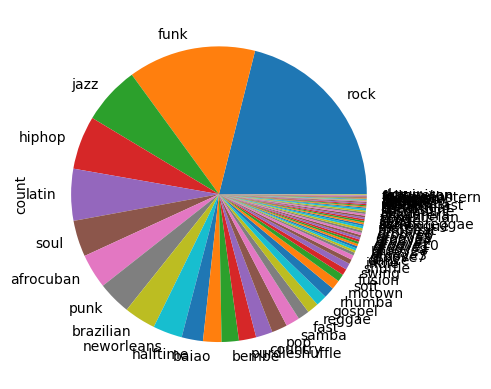

In [10]:
# value counts of seperated styles
style_counts = pd.concat([data.style1, data.style2, data.style3]).value_counts()
print(style_counts.head(25))
style_counts.plot(kind="pie")

In [11]:
data_encoded = pd.get_dummies(data, columns=["style1", "style2", "style3"], prefix=["", "", ""], prefix_sep=["", "", ""])

In [12]:
data_encoded.columns

Index(['drummer', 'session', 'id', 'style', 'bpm', 'beat_type',
       'time_signature', 'midi_filename', 'audio_filename', 'duration',
       'split', 'afrobeat', 'afrocuban', 'blues', 'country', 'dance', 'funk',
       'gospel', 'hiphop', 'jazz', 'latin', 'middleeastern', 'neworleans',
       'pop', 'punk', 'reggae', 'rock', 'soul', 'brazilian', 'dominican',
       'venezuelan', 'ando', 'baiao', 'bembe', 'bomba', 'bossa', 'brazilian',
       'breakbeat', 'calypso', 'chacarera', 'chacha', 'disco', 'fast', 'folk',
       'frevo', 'funk', 'fusion', 'groove1', 'groove10', 'groove2', 'groove3',
       'groove4', 'groove5', 'groove6', 'groove7', 'groove8', 'groove9',
       'halftime', 'ijexa', 'indie', 'joropo', 'klezmer', 'latin', 'linear',
       'maracatu', 'march', 'mediumfast', 'merengue', 'motown', 'prog',
       'purdieshuffle', 'reggaeton', 'rhumba', 'rock', 'rockabilly', 'samba',
       'sambareggae', 'sangueo', 'secondline', 'shuffle', 'slow', 'soft',
       'songo', 'swing'],
 

In [13]:
data_encoded.head()

,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,...,rockabilly,samba,sambareggae,sangueo,secondline,shuffle,slow,soft,songo,swing
0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,27.872308,...,False,False,False,False,False,False,False,False,False,False
1,drummer1,drummer1/eval_session,drummer1/eval_session/10,soul/groove10,102,beat,4-4,drummer1/eval_session/10_soul-groove10_102_bea...,drummer1/eval_session/10_soul-groove10_102_bea...,37.691158,...,False,False,False,False,False,False,False,False,False,False
2,drummer1,drummer1/eval_session,drummer1/eval_session/2,funk/groove2,105,beat,4-4,drummer1/eval_session/2_funk-groove2_105_beat_...,drummer1/eval_session/2_funk-groove2_105_beat_...,36.351218,...,False,False,False,False,False,False,False,False,False,False
3,drummer1,drummer1/eval_session,drummer1/eval_session/3,soul/groove3,86,beat,4-4,drummer1/eval_session/3_soul-groove3_86_beat_4...,drummer1/eval_session/3_soul-groove3_86_beat_4...,44.716543,...,False,False,False,False,False,False,False,False,False,False
4,drummer1,drummer1/eval_session,drummer1/eval_session/4,soul/groove4,80,beat,4-4,drummer1/eval_session/4_soul-groove4_80_beat_4...,drummer1/eval_session/4_soul-groove4_80_beat_4...,47.987500,...,False,False,False,False,False,False,False,False,False,False


In [14]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1133
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   drummer         1090 non-null   object 
 1   session         1090 non-null   object 
 2   id              1090 non-null   object 
 3   style           1090 non-null   object 
 4   bpm             1090 non-null   int64  
 5   beat_type       1090 non-null   object 
 6   time_signature  1090 non-null   object 
 7   midi_filename   1090 non-null   object 
 8   audio_filename  1090 non-null   object 
 9   duration        1090 non-null   float64
 10  split           1090 non-null   object 
 11  afrobeat        1090 non-null   bool   
 12  afrocuban       1090 non-null   bool   
 13  blues           1090 non-null   bool   
 14  country         1090 non-null   bool   
 15  dance           1090 non-null   bool   
 16  funk            1090 non-null   bool   
 17  gospel          1090 non-null   bool  

In [15]:
data_encoded.brazilian = data_encoded.brazilian

In [16]:
data_encoded[data_encoded.brazilian == 1]

ValueError: cannot reindex on an axis with duplicate labels